In [1]:
import pandas as pd
import numpy as np


In [2]:
letters = pd.read_csv("letters.csv")

In [3]:
letters

,label,pixel43,pixel44,pixel92,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,...,pixel329,pixel351,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417
0,1,0,0,0,0,0,0,0,0,0,...,0,254,0,0,0,0,0,0,0,0
1,0,0,0,0,137,137,192,86,72,1,...,254,0,0,75,254,254,254,17,0,0
2,1,0,0,0,3,141,139,3,0,0,...,0,184,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,94,255,69,0,0,0,0,0
4,0,0,0,0,155,254,254,254,157,30,...,253,0,0,0,223,253,253,253,129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,2,0,0,1,248,253,176,43,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,128,...,0,0,0,0,255,255,0,0,0,0
41997,2,0,0,0,255,255,191,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,2,0,0,0,255,128,0,0,0,0,...,0,255,0,0,0,0,0,0,0,0


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


# Features and target
X = letters.drop(columns=['label'])
y = letters['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Build the KNN model with the best parameters
best_knn = KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance')

# Train the model
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate the model
print('Classification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       861
           1       0.77      0.96      0.85       971
           2       0.69      0.61      0.65       817
           3       0.62      0.56      0.59       834
           4       0.72      0.52      0.60       802
           5       0.66      0.56      0.60       744
           6       0.82      0.87      0.85       821
           7       0.48      0.61      0.54       914
           8       0.62      0.53      0.57       789
           9       0.46      0.49      0.48       847

    accuracy                           0.67      8400
   macro avg       0.67      0.66      0.66      8400
weighted avg       0.67      0.67      0.66      8400



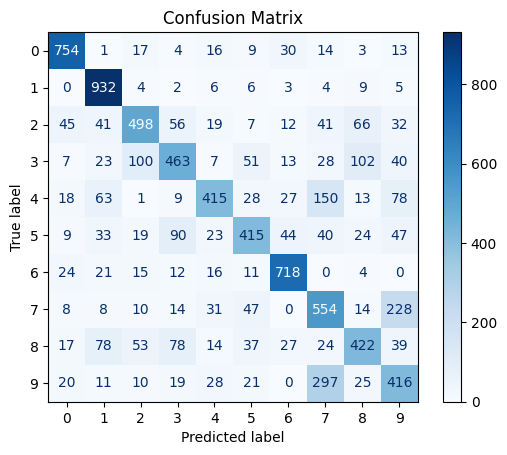

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2  # Import l2 regularizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assuming 'letters' DataFrame is already loaded
X = letters.drop(columns=['label']).values
y = letters['label'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define input shape here
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer matches number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=25, validation_split=0.1, verbose=0)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_classes))


263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       861
           1       0.84      0.95      0.89       971
           2       0.73      0.65      0.69       817
           3       0.67      0.60      0.63       834
           4       0.78      0.58      0.67       802
           5       0.67      0.65      0.66       744
           6       0.86      0.91      0.89       821
           7       0.49      0.68      0.57       914
           8       0.65      0.58      0.62       789
           9       0.49      0.45      0.47       847

    accuracy                           0.70      8400
   macro avg       0.71      0.70      0.70      8400
weighted avg       0.71      0.70      0.70      8400



263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step


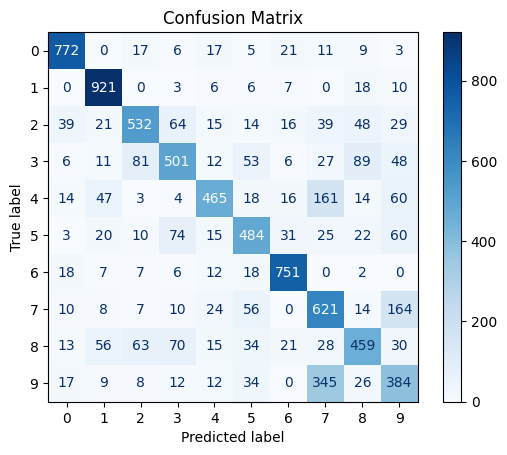

In [7]:
# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Print the confusion matrix
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [8]:
# Generate a DataFrame with Actual and Predicted values
results_nn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_classes  # Neural network predictions
})

# Save the results to a CSV file
output_path_nn = "nn_test_results_week5.csv"
results_nn.to_csv(output_path_nn, index=False)

print(f"Results saved to {output_path_nn}")
saved_results_nn = pd.read_csv(output_path_nn)
print(saved_results_nn.head())


Results saved to nn_test_results_week5.csv
   Actual  Predicted
0       0          0
1       1          1
2       0          0
3       0          0
4       4          4
